<a href="https://colab.research.google.com/github/usmankhawar22/IBM-DATA-VISUALISATION/blob/master/client_task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Downloading and Prepping Data <a id="2"></a>

In [4]:
import numpy as np  # useful for many scientific computing in Python
import pandas as pd # primary data structure library

In [5]:
df = pd.read_excel('schools-ge-by-zone-stage-2012-2013.xlsx',
                       sheet_name='Sheet1',
                      #  skiprows=range(20),
                      #  skipfooter=2
                      )

print('Data downloaded and read into a dataframe!')

Data downloaded and read into a dataframe!


Let's take a look at the first five items in our dataset.

In [6]:
df.head()

,Year,Category_EN,Category_AR,Zone_EN,Zone_AR,Stage_EN,Stage_AR,School_Count
0,2012/2013,Government Education,تعليم حكومي,Abu Dhabi Edu. Zone,منطقة أبوظبي التعليمية,kindergarten,رياض الاطفال,26
1,2012/2013,Government Education,تعليم حكومي,Al Ain Edu. Zone,منطقة العين التعليمية,kindergarten,رياض الاطفال,19
2,2012/2013,Government Education,تعليم حكومي,Al Garbia Edu. Zone,المنطقة الغربية التعليمية,kindergarten,رياض الاطفال,6
3,2012/2013,Government Education,تعليم حكومي,Dubai Edu. Zone,منطقة دبي التعليمية,kindergarten,رياض الاطفال,12
4,2012/2013,Government Education,تعليم حكومي,Sharjah Edu. Zone,منطقة الشارقة التعليمية,kindergarten,رياض الاطفال,23


Let's find out how many entries there are in our dataset.

In [8]:
df.drop(['Year', 'Category_EN', 'Category_AR', 'Zone_AR', 'Stage_AR'], axis=1, inplace=True)

# let's view the first five elements and see how the dataframe was changed
df.head()

,Zone_EN,Stage_EN,School_Count
0,Abu Dhabi Edu. Zone,kindergarten,26
1,Al Ain Edu. Zone,kindergarten,19
2,Al Garbia Edu. Zone,kindergarten,6
3,Dubai Edu. Zone,kindergarten,12
4,Sharjah Edu. Zone,kindergarten,23


Notice how the columns Type, Coverage, AREA, REG, and DEV got removed from the dataframe.

In [11]:
df.columns = list(map(str, df.columns))

# let's check the column labels types now
all(isinstance(column, str) for column in df.columns)

True

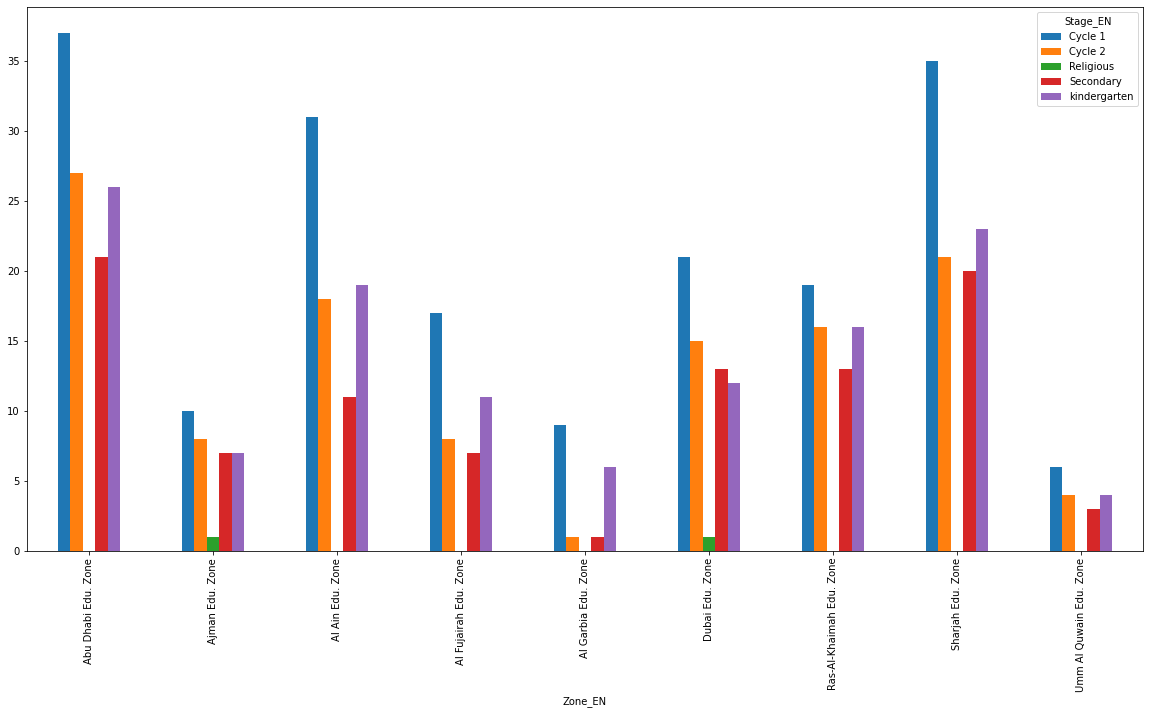

In [16]:
pd.pivot_table(df, values = 'School_Count', index = 'Zone_EN', columns = 'Stage_EN').plot.bar(figsize=(20,10))



In [21]:
df_continents = df.groupby('Stage_EN', axis=0).sum()
df_continents

,School_Count
Stage_EN,
Cycle 1,185
Cycle 2,118
Religious,2
Secondary,96
kindergarten,124


In [24]:
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot') # optional: for ggplot-like style

# check for latest version of Matplotlib
print('Matplotlib version: ', mpl.__version__) # >= 2.0.0

Matplotlib version:  3.2.1


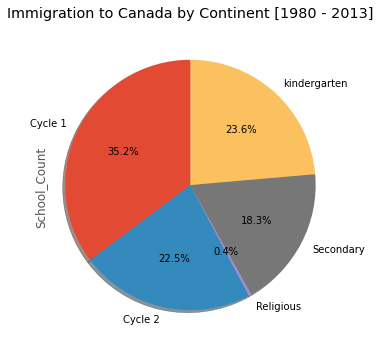

In [25]:
# autopct create %, start angle represent starting point
df_continents['School_Count'].plot(kind='pie',
                            figsize=(5, 6),
                            autopct='%1.1f%%', # add in percentages
                            startangle=90,     # start angle 90° (Africa)
                            shadow=True,       # add shadow      
                            )

plt.title('Immigration to Canada by Continent [1980 - 2013]')
plt.axis('equal') # Sets the pie chart to look like a circle.

plt.show()

In [26]:
dfc = df.groupby('Zone_EN', axis=0).sum()
dfc

,School_Count
Zone_EN,
Abu Dhabi Edu. Zone,111
Ajman Edu. Zone,33
Al Ain Edu. Zone,79
Al Fujairah Edu. Zone,43
Al Garbia Edu. Zone,17
Dubai Edu. Zone,62
Ras-Al-Khaimah Edu. Zone,64
Sharjah Edu. Zone,99
Umm Al Quwain Edu. Zone,17


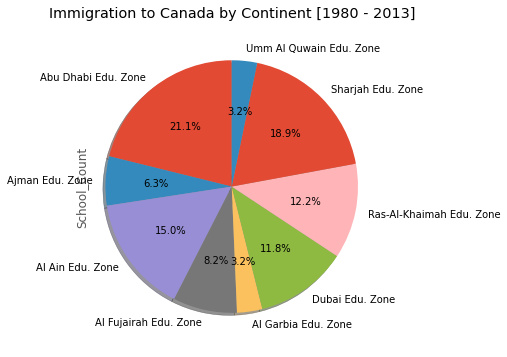

In [28]:

dfc['School_Count'].plot(kind='pie',
                            figsize=(5, 6),
                            autopct='%1.1f%%', # add in percentages
                            startangle=90,     # start angle 90° (Africa)
                            shadow=True,       # add shadow      
                            )

plt.title('Immigration to Canada by Continent [1980 - 2013]')
plt.axis('equal') # Sets the pie chart to look like a circle.

plt.show()